# Exercise 15.7

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

### Checking the Sample and Target Sizes

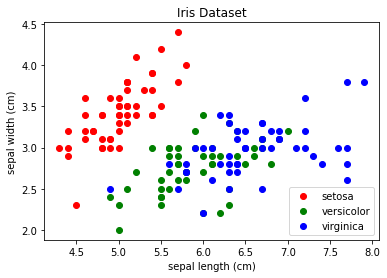

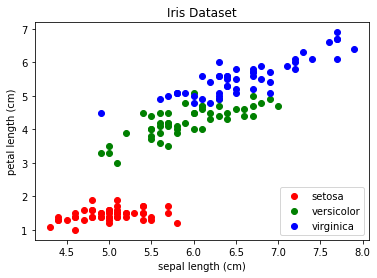

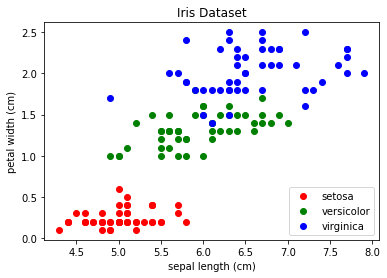

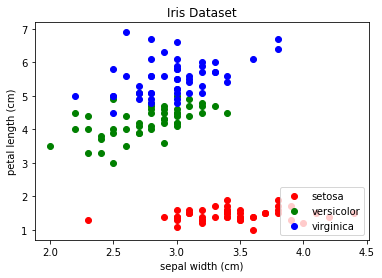

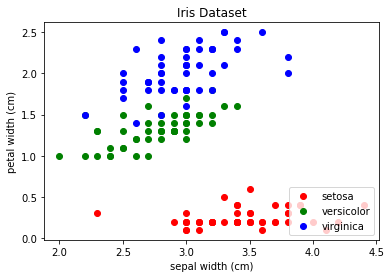

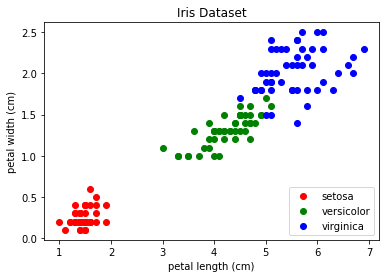

In [3]:
def plot_iris(f1, f2):
    n_samples = len(iris.target)
    for t in set(iris.target):
        x = [iris.data[i,f1] for i in range(n_samples) if iris.target[i]==t]
        y = [iris.data[i,f2] for i in range(n_samples) if iris.target[i]==t]
        plt.scatter(x,
                    y,
                    color=['red', 'green', 'blue'][t],
                    label=iris.target_names[t])
    plt.xlabel(iris.feature_names[f1])
    plt.ylabel(iris.feature_names[f2])
    plt.title('Iris Dataset')
    plt.legend(iris.target_names, loc='lower right')
    plt.show()

n_features = len(iris.feature_names)
pairs = [(i, j) for i in range(n_features) for j in range(i+1, n_features)]

for (f1, f2) in pairs:
    plot_iris(f1, f2)

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

### Splitting the Data for Training and Testing 

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
     iris.data, iris.target, random_state=11)

### Training and Testing Set Sizes

In [8]:
X_train.shape

(112, 4)

In [9]:
X_test.shape

(38, 4)

### Creating the Model 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

### Training the Model 

In [12]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

### Predicting Digit Classes 

In [13]:
predicted = knn.predict(X=X_test)

In [14]:
expected = y_test

In [15]:
predicted

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1])

In [16]:
expected

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1])

In [17]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [18]:
wrong

[(1, 2)]

In [19]:
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

97.37%


### Estimator Method `score`

In [20]:
print(f'{knn.score(X_test, y_test):.2%}')

97.37%


### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [23]:
confusion

array([[12,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 14]], dtype=int64)

### Classification Report

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(expected, predicted, 
       target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Visualizing the Confusion Matrix

In [26]:
import pandas as pd

In [27]:
confusion_df = pd.DataFrame(confusion, index=iris.target_names,
     columns=iris.target_names)

In [28]:
import seaborn as sns

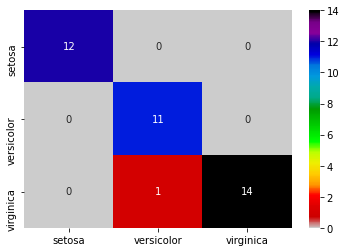

In [29]:
axes = sns.heatmap(confusion_df, annot=True, 
                cmap='nipy_spectral_r')

### K-Fold Cross-Validation

In [30]:
from sklearn.model_selection import KFold

In [31]:
kfold = KFold(n_splits=4, random_state=11, shuffle=True)

### Using the `KFold` Object with Function `cross_val_score` 

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(estimator=knn, X=iris.data, 
     y=iris.target, cv=kfold)

In [34]:
scores

array([0.97368421, 0.94736842, 0.94594595, 0.97297297])

In [35]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 96.00%


In [36]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 1.33%


### Exercise 15.8: Hyperparameter Tuning 

In [37]:
for k in range(1, 20, 2):
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(estimator=knn, 
         X=iris.data, y=iris.target, cv=kfold)
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=95.33%; standard deviation=5.21%
k=3 ; mean accuracy=96.00%; standard deviation=4.42%
k=5 ; mean accuracy=95.33%; standard deviation=5.21%
k=7 ; mean accuracy=96.67%; standard deviation=5.37%
k=9 ; mean accuracy=96.67%; standard deviation=4.47%
k=11; mean accuracy=97.33%; standard deviation=4.42%
k=13; mean accuracy=96.00%; standard deviation=4.42%
k=15; mean accuracy=97.33%; standard deviation=4.42%
k=17; mean accuracy=97.33%; standard deviation=4.42%
k=19; mean accuracy=96.67%; standard deviation=4.47%


### Exercise 15.9: Choosing the Best Estimator 

In [38]:
from sklearn.svm import SVC

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()}

In [41]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=iris.data, y=iris.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=96.67%; standard deviation=4.47%
                 SVC: mean accuracy=94.67%; standard deviation=4.99%
          GaussianNB: mean accuracy=94.67%; standard deviation=6.53%
